# Week_01 challenge 

## Programming Assignment - GitHub


### Github Link

https://github.com/KaleAdi 

### Github profile

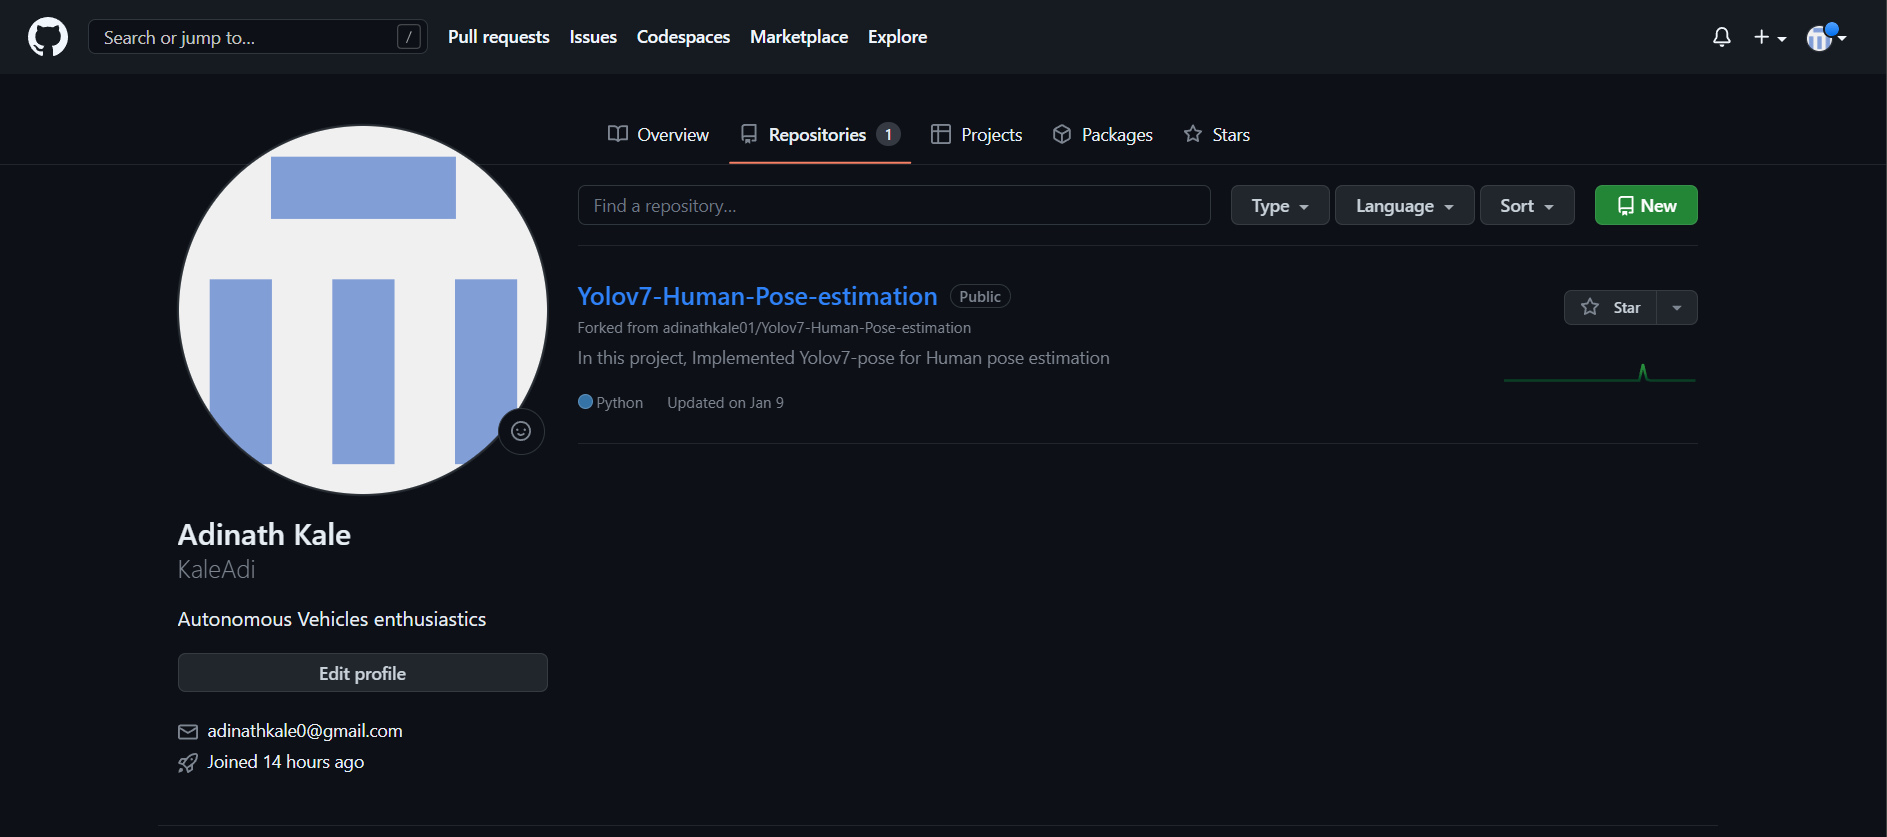

### Setting SSHKey

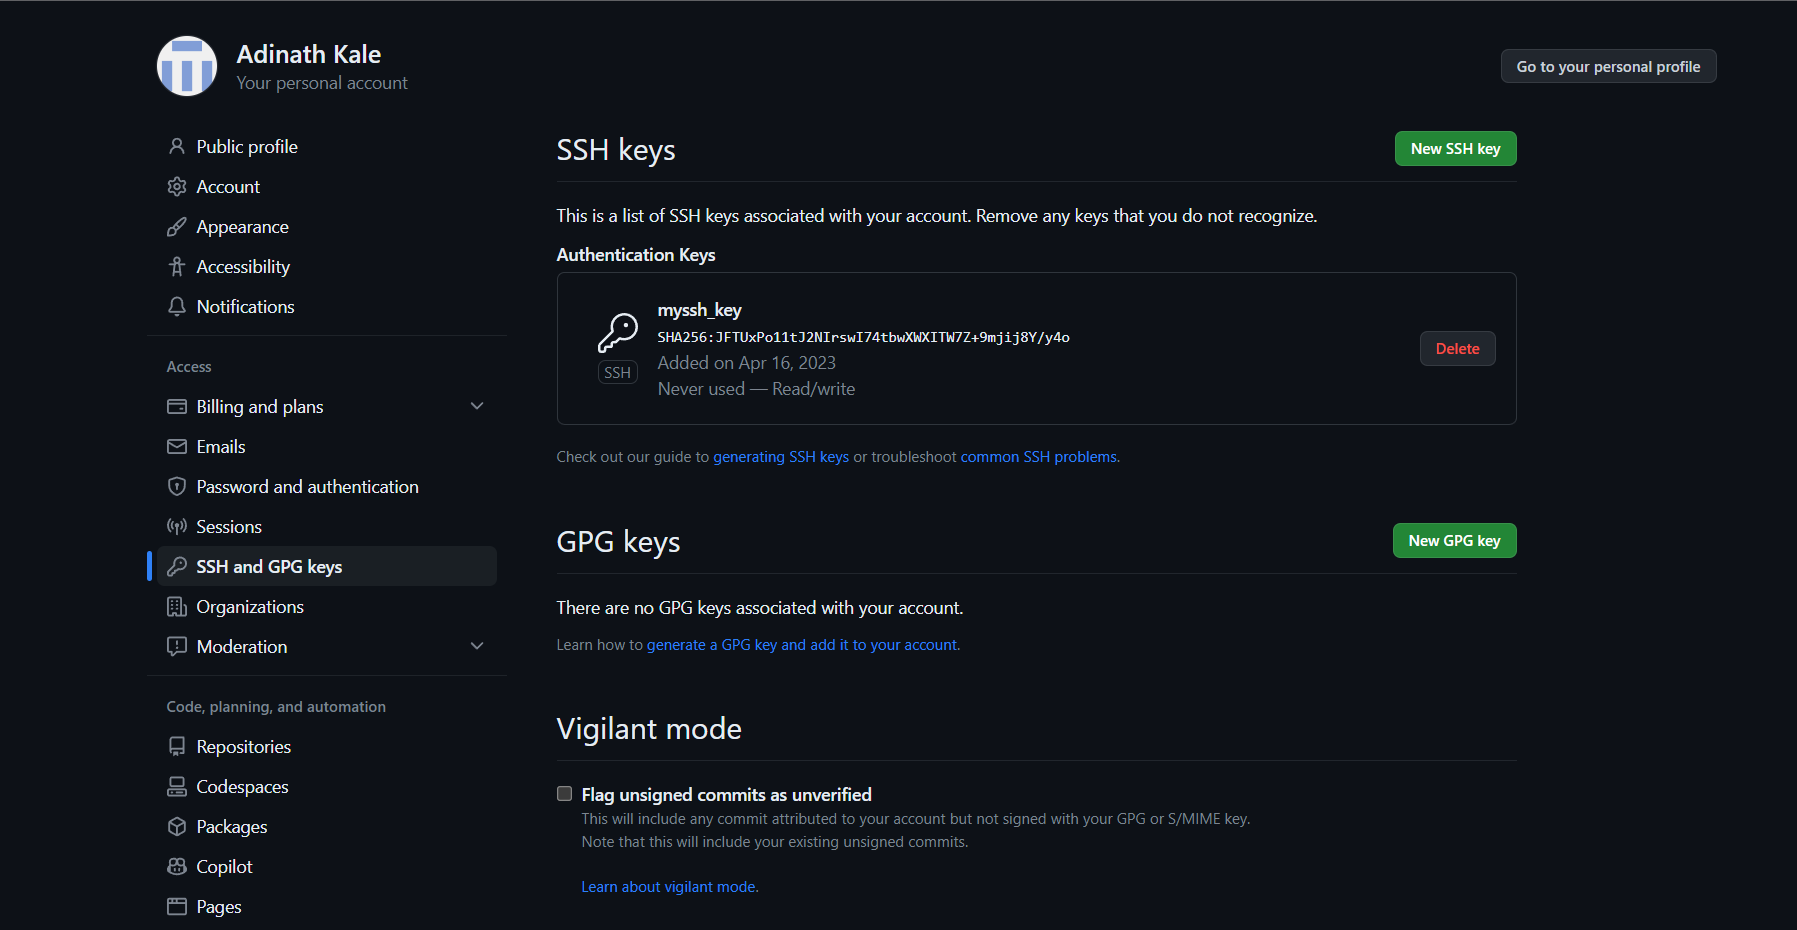

## Programming Assignment - Python 

In [1]:
import os
os.getcwd()

'C:\\Users\\adina\\OneDrive\\Desktop\\Introduction_to_ROS_Github_Linux\\Week_01'

In [2]:
import datetime
import json

# Define the file name to use for storing guest data
GUEST_DATA_FILE = "guest_data.json"

# Load existing guest data from the file, if it exists
try:
    with open(GUEST_DATA_FILE, "r") as f:
        guest_data = json.load(f)
except FileNotFoundError:
    guest_data = {}

# Function to check-in a guest
def check_in():
    # Ask for guest information
    guest_name = input("Hello, what is your name? ")
    num_days = int(input("How many days will you be staying with us? "))
    budget = float(input("What is your budget for this stay? "))
    has_coupon = input("Do you have a discount coupon? (y/n) ").lower() == "y"
    discount = 0.1 if has_coupon else 0

    # Assign a room number based on the guest's budget
    if budget >= 1000:
        room_num = 101
    elif budget >= 500:
        room_num = 201
    else:
        room_num = 301

    # Store the user data, check-in time and room charge in the guest_data dictionary
    check_in_time = datetime.datetime.now().isoformat()
   
    guest_data[guest_name] = {
        "check_in_time": check_in_time, 
        "room_num": room_num, 
        "charge_per_day": budget / num_days,
        "discount_coupon": discount}

    # Print check-in information
    print("Welcome to Hotel Robotica, " + guest_name + "!")
    print("You have been assigned room " + str(room_num) + ".")
    print("Your room rate is Rs " + str(guest_data[guest_name]["charge_per_day"]) + " per day.")
    print("Your check-in time is " + check_in_time)

    # Write the guest data to the file
    with open(GUEST_DATA_FILE, "w") as f:
        json.dump(guest_data, f)

# Function to check-out a guest
def check_out():
    # Ask for guest name
    guest_name = input("Please enter your name to check out: ")

    # Check if guest is checked-in
    if guest_name in guest_data:
        # Calculate the total charge
        check_in_time = guest_data[guest_name]["check_in_time"]
        days_stayed = (datetime.datetime.now() - datetime.datetime.fromisoformat(check_in_time)).days
        charge_per_day = guest_data[guest_name]["charge_per_day"]
        total_charge = days_stayed * guest_data[guest_name]["charge_per_day"]
        #discount_coupon = guest_data[guest_name]["discount_coupon"]
        
        if "discount_coupon" in guest_data[guest_name]:
            discount_coupon = guest_data[guest_name]["discount_coupon"]
        else:
            discount_coupon = 0

        
        # Apply discount coupon if guest has one
        if discount_coupon > 0:
            discount_amount = total_charge * discount_coupon
            total_charge -= discount_amount
            print("Discount applied: 10% off the total bill amount.")

        # Print the invoice for the guest
        print("Invoice:")
        print("Name:", guest_name)
        print("Check-in time:", check_in_time)
        print("Check-out time:", datetime.datetime.now().isoformat())
        print("Total Cost:", total_charge)
        print("Thank you for staying with us! We hope to see you again soon.")

        # Remove the guest from the guest_data dictionary
        del guest_data[guest_name]

        # Write the updated guest data to the file
        with open(GUEST_DATA_FILE, "w") as f:
            json.dump(guest_data, f)
    else:
        print("Sorry, there is no guest checked in with that name.")

# Main program loop
while True:
    print("\nHotel Robotica Management System")
    print("1. Check-in a guest")
    print("2. Check-out a guest")
    print("3. Exit")

    choice = input("Enter your choice (1-3): ")
   
    if choice == "1":
        check_in()
    elif choice == "2":
        check_out()
    elif choice == "3":
        print("Goodbye!")
        break
    else:
        print("Invalid choice. Please try again.")



Hotel Robotica Management System
1. Check-in a guest
2. Check-out a guest
3. Exit


Enter your choice (1-3):  check-in


Invalid choice. Please try again.

Hotel Robotica Management System
1. Check-in a guest
2. Check-out a guest
3. Exit


Enter your choice (1-3):  1
Hello, what is your name?  Nikita
How many days will you be staying with us?  2
What is your budget for this stay?  100
Do you have a discount coupon? (y/n)  y


Welcome to Hotel Robotica, Nikita!
You have been assigned room 301.
Your room rate is Rs 50.0 per day.
Your check-in time is 2023-04-19T22:30:15.859844

Hotel Robotica Management System
1. Check-in a guest
2. Check-out a guest
3. Exit


Enter your choice (1-3):  2
Please enter your name to check out:  Nikita


Discount applied: 10% off the total bill amount.
Invoice:
Name: Nikita
Check-in time: 2023-04-19T22:30:15.859844
Check-out time: 2023-04-19T22:30:26.753558
Total Cost: 0.0
Thank you for staying with us! We hope to see you again soon.

Hotel Robotica Management System
1. Check-in a guest
2. Check-out a guest
3. Exit


Enter your choice (1-3):  3


Goodbye!
